<a href="https://colab.research.google.com/github/Aditya-Raj-Kaushik/FlyDubai/blob/main/Mishandling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("passenger_mishandling_large_dataset.csv")

print(df.shape)
df.head()

(20768, 32)


,Flight Number,Day of Operation,STA (Standard Time of Arrival),ETA (Estimated Time of Arrival),ATA (Actual Time of Arrival),ETD (Estimated Time of Departure),ATD (Actual Time of Departure),Airport Terminal Number,Passenger Connecting Time (mins),Number of Checked-in Passengers,...,Arrival Delay (mins),Departure Delay (mins),Passenger Irregularity Report (PIR) Created,Baggage Traced,Baggage Delivered,Baggage Not Traced,Airport Terminal Congestion Level,Gate Congestion Level,Weather Conditions,Passenger Mishandling Probability (%)
0,3857,MO,2025-01-01 14:41:00,2025-01-01 15:01:00,2025-01-01 15:43:00,2025-01-01 17:23:00,2025-01-01 17:35:00,3.0,48.0,203.0,...,82.0,47.0,1.0,1.0,0.0,1.0,High,High,Clear,99.0
1,6741,TU,2025-01-01 12:40:00,2025-01-01 12:43:00,2025-01-01 13:08:00,2025-01-01 14:08:00,2025-01-01 13:42:00,3.0,75.0,129.0,...,92.0,71.0,1.0,1.0,1.0,1.0,High,High,Stormy,100.0
2,5421,SA,2025-01-01 05:22:00,2025-01-01 05:27:00,2025-01-01 05:46:00,2025-01-01 08:43:00,2025-01-01 08:46:00,1.0,144.0,132.0,...,103.0,109.0,0.0,0.0,0.0,1.0,High,Medium,Rainy,92.7
3,1374,TH,2025-01-01 20:05:00,2025-01-01 19:52:00,2025-01-01 19:45:00,2025-01-01 21:33:00,2025-01-01 21:26:00,4.0,103.0,91.0,...,112.0,85.0,0.0,1.0,0.0,0.0,Low,High,Rainy,85.6
4,9370,TU,2025-01-01 08:43:00,2025-01-01 08:53:00,2025-01-01 09:38:00,2025-01-01 11:02:00,2025-01-01 10:11:00,4.0,119.0,62.0,...,85.0,42.0,0.0,0.0,0.0,1.0,Low,High,Rainy,83.9


In [ ]:
categorical_cols = [
    "Day of Operation", "Passenger Class of Travel", "Reservation Status", "Baggage Status",
    "Weather Conditions", "Airport Terminal Congestion Level", "Gate Congestion Level"
]

In [ ]:
df.drop(columns=["Flight Number", "Seat Number", "Sequence Number (Checked-in)"], inplace=True)

In [ ]:
df.isnull().sum()

,0
Day of Operation,0
STA (Standard Time of Arrival),0
ETA (Estimated Time of Arrival),0
ATA (Actual Time of Arrival),0
ETD (Estimated Time of Departure),1
ATD (Actual Time of Departure),1
Airport Terminal Number,1
Passenger Connecting Time (mins),1
Number of Checked-in Passengers,1
Number of Checked-in Infant Passengers,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

In [ ]:
target_col = 'Passenger Mishandling Probability (%)'

In [ ]:
datetime_cols = ['STA (Standard Time of Arrival)', 'ETA (Estimated Time of Arrival)',
                 'ATA (Actual Time of Arrival)', 'ETD (Estimated Time of Departure)',
                 'ATD (Actual Time of Departure)']

for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

for col in datetime_cols:
    df[f'{col}_hour'] = df[col].dt.hour
    df[f'{col}_minute'] = df[col].dt.minute

df = df.drop(columns=datetime_cols)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (16614, 33)
Test shape: (4154, 33)


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Before fitting, check for and handle NaN or inf values in y_train
# Create a boolean mask where y_train is NOT NaN and NOT infinity
valid_indices = y_train.replace([np.inf, -np.inf], np.nan).dropna().index

# Filter X_train and y_train using the valid indices
X_train_cleaned = X_train.loc[valid_indices]
y_train_cleaned = y_train.loc[valid_indices]

# Ensure the target column dtype is suitable for XGBoost (typically float32 or float64)
y_train_cleaned = y_train_cleaned.astype(float)


xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Fit the model using the cleaned training data
xgb_model.fit(X_train_cleaned, y_train_cleaned)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("XGBoost Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

XGBoost Regressor Performance:
Mean Absolute Error (MAE): 1.47
Mean Squared Error (MSE): 3.65
Root Mean Squared Error (RMSE): 1.91
R² Score: 0.99


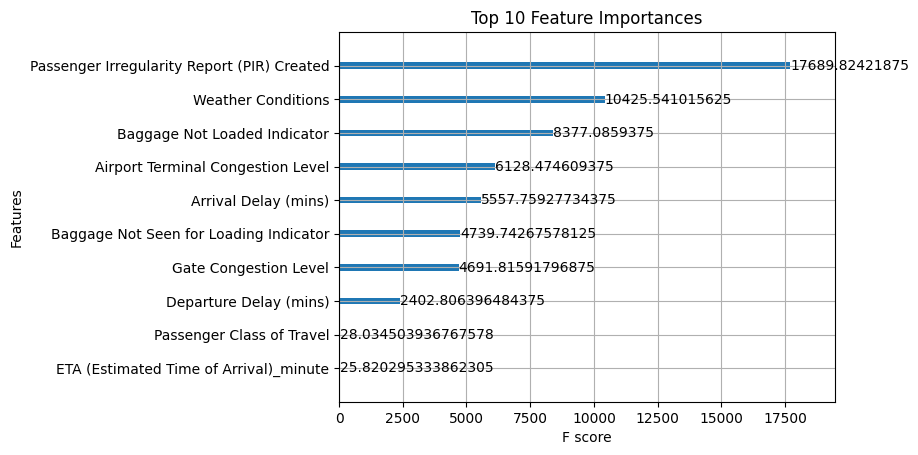

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()

In [ ]:
import joblib

joblib.dump(xgb_model, 'xgb_model.pkl')
print("Model saved as xgb_model.pkl")

Model saved as xgb_model.pkl


In [ ]:
print(X_test.dtypes)
print(X_test.describe())

Day of Operation                                 int64
Airport Terminal Number                        float64
Passenger Connecting Time (mins)               float64
Number of Checked-in Passengers                float64
Number of Checked-in Infant Passengers         float64
Passenger Class of Travel                        int64
Reservation Status                               int64
Onward Connection Indicator                    float64
Number of Baggage Items                        float64
Weight of Baggage (kg)                         float64
Baggage Status                                   int64
Baggage Not Loaded Indicator                   float64
Baggage Not Seen for Loading Indicator         float64
Interline Flight Indicator                     float64
Arrival Delay (mins)                           float64
Departure Delay (mins)                         float64
Passenger Irregularity Report (PIR) Created    float64
Baggage Traced                                 float64
Baggage De

In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of rows
n_rows = 15

# Dummy Data Dictionary
data = {
    'Airport Terminal Number': np.random.randint(1, 6, size=n_rows),
    'Passenger Connecting Time (mins)': np.random.randint(30, 180, size=n_rows),
    'Number of Checked-in Passengers': np.random.randint(50, 300, size=n_rows),
    'Number of Checked-in Infant Passengers': np.random.randint(0, 10, size=n_rows),
    'Onward Connection Indicator': np.random.randint(0, 2, size=n_rows),
    'Number of Baggage Items': np.random.randint(0, 5, size=n_rows),
    'Weight of Baggage (kg)': np.random.randint(0, 100, size=n_rows),
    'Baggage Not Loaded Indicator': np.random.randint(0, 2, size=n_rows),
    'Baggage Not Seen for Loading Indicator': np.random.randint(0, 2, size=n_rows),
    'Interline Flight Indicator': np.random.randint(0, 2, size=n_rows),
    'Arrival Delay (mins)': np.random.randint(0, 500, size=n_rows),
    'Departure Delay (mins)': np.random.randint(0, 500, size=n_rows),
    'Passenger Irregularity Report (PIR) Created': np.random.randint(0, 2, size=n_rows),
    'Baggage Traced': np.random.randint(0, 2, size=n_rows),
    'Baggage Delivered': np.random.randint(0, 2, size=n_rows),
    'Baggage Not Traced': np.random.randint(0, 2, size=n_rows),
    'Arrival Delay (calculated)': np.round(np.random.uniform(0, 500, size=n_rows), 2),
    'Departure Delay (calculated)': np.round(np.random.uniform(0, 500, size=n_rows), 2),
    'Total Delay (mins)': np.round(np.random.uniform(0, 1000, size=n_rows), 2),
    'Arrival Hour': np.random.randint(0, 24, size=n_rows),
    'Departure Hour': np.random.randint(0, 24, size=n_rows),
    'Is Weekend': np.random.randint(0, 2, size=n_rows),

    # Day of Operation (one-hot encoding)
    'Day of Operation_FR': np.random.choice([True, False], size=n_rows),
    'Day of Operation_MO': np.random.choice([True, False], size=n_rows),
    'Day of Operation_SA': np.random.choice([True, False], size=n_rows),
    'Day of Operation_SU': np.random.choice([True, False], size=n_rows),
    'Day of Operation_TH': np.random.choice([True, False], size=n_rows),
    'Day of Operation_TU': np.random.choice([True, False], size=n_rows),
    'Day of Operation_WE': np.random.choice([True, False], size=n_rows),

    # Passenger Class of Travel
    'Passenger Class of Travel_Business': np.random.choice([True, False], size=n_rows),
    'Passenger Class of Travel_Economy': np.random.choice([True, False], size=n_rows),
    'Passenger Class of Travel_First': np.random.choice([True, False], size=n_rows),

    # Reservation Status
    'Reservation Status_Boarded': np.random.choice([True, False], size=n_rows),
    'Reservation Status_Checked-in': np.random.choice([True, False], size=n_rows),
    'Reservation Status_Offloaded': np.random.choice([True, False], size=n_rows),
    'Reservation Status_Standby': np.random.choice([True, False], size=n_rows),

    # Baggage Status
    'Baggage Status_Boarded': np.random.choice([True, False], size=n_rows),
    'Baggage Status_Checked-in': np.random.choice([True, False], size=n_rows),
    'Baggage Status_Offloaded': np.random.choice([True, False], size=n_rows),
    'Baggage Status_Standby': np.random.choice([True, False], size=n_rows),

    # Weather Conditions
    'Weather Conditions_Clear': np.random.choice([True, False], size=n_rows),
    'Weather Conditions_Rainy': np.random.choice([True, False], size=n_rows),
    'Weather Conditions_Stormy': np.random.choice([True, False], size=n_rows),

    # Congestion Levels
    'Airport Terminal Congestion Level_High': np.random.choice([True, False], size=n_rows),
    'Airport Terminal Congestion Level_Low': np.random.choice([True, False], size=n_rows),
    'Airport Terminal Congestion Level_Medium': np.random.choice([True, False], size=n_rows),
    'Gate Congestion Level_High': np.random.choice([True, False], size=n_rows),
    'Gate Congestion Level_Low': np.random.choice([True, False], size=n_rows),
    'Gate Congestion Level_Medium': np.random.choice([True, False], size=n_rows),

    # Time columns (hour + minute)
    'STA (Standard Time of Arrival)_hour': np.random.randint(0, 24, size=n_rows),
    'STA (Standard Time of Arrival)_minute': np.random.randint(0, 60, size=n_rows),
    'ETA (Estimated Time of Arrival)_hour': np.random.randint(0, 24, size=n_rows),
    'ETA (Estimated Time of Arrival)_minute': np.random.randint(0, 60, size=n_rows),
    'ATA (Actual Time of Arrival)_hour': np.random.randint(0, 24, size=n_rows),
    'ATA (Actual Time of Arrival)_minute': np.random.randint(0, 60, size=n_rows),
    'ETD (Estimated Time of Departure)_hour': np.random.randint(0, 24, size=n_rows),
    'ETD (Estimated Time of Departure)_minute': np.random.randint(0, 60, size=n_rows),
    'ATD (Actual Time of Departure)_hour': np.random.randint(0, 24, size=n_rows),
    'ATD (Actual Time of Departure)_minute': np.random.randint(0, 60, size=n_rows),

    # Target column
    'Passenger Mishandling Probability (%)': np.round(np.random.uniform(0, 100, size=n_rows), 2)
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_file = 'dummy_airport_data.csv'
df.to_csv(csv_file, index=False)

# Display the first few rows
df.head()


,Airport Terminal Number,Passenger Connecting Time (mins),Number of Checked-in Passengers,Number of Checked-in Infant Passengers,Onward Connection Indicator,Number of Baggage Items,Weight of Baggage (kg),Baggage Not Loaded Indicator,Baggage Not Seen for Loading Indicator,Interline Flight Indicator,...,STA (Standard Time of Arrival)_minute,ETA (Estimated Time of Arrival)_hour,ETA (Estimated Time of Arrival)_minute,ATA (Actual Time of Arrival)_hour,ATA (Actual Time of Arrival)_minute,ETD (Estimated Time of Departure)_hour,ETD (Estimated Time of Departure)_minute,ATD (Actual Time of Departure)_hour,ATD (Actual Time of Departure)_minute,Passenger Mishandling Probability (%)
0,4,67,184,3,0,3,64,0,0,0,...,28,7,16,18,32,4,2,7,28,55.16
1,5,159,70,6,0,0,88,0,1,0,...,42,9,6,6,37,3,15,3,12,16.48
2,3,50,122,7,1,4,70,1,1,0,...,10,8,24,2,52,2,22,7,45,41.13
3,5,87,216,2,1,4,8,0,0,1,...,17,17,44,12,5,18,56,17,34,77.76
4,5,51,67,0,1,1,87,1,0,0,...,46,1,3,12,57,19,10,4,5,48.04


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import xgboost as xgb

df = pd.read_csv('dummy_airport_data.csv')

X = df.drop(columns=['Passenger Mishandling Probability (%)'])
y = df['Passenger Mishandling Probability (%)']

model = joblib.load('xgb_model.pkl')

print(f"Type of loaded model: {type(model)}")

try:
    booster = model.get_booster()
    print(f"Successfully accessed internal booster. Type: {type(booster)}")
except xgb.core.XGBoostError as e:
    print(f"Failed to access internal booster: {e}")
numerical_cols = X.select_dtypes(include=np.number)

if X.isnull().values.any() or np.isinf(numerical_cols.values).any():
    print("Warning: X contains NaN or Inf values in numerical columns. XGBoost predict may have issues.")

y_pred = model.predict(X)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Type of loaded model: <class 'xgboost.sklearn.XGBRegressor'>
Successfully accessed internal booster. Type: <class 'xgboost.core.Booster'>
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R² Score: 1.00
